In [12]:
import gc, argparse, sys, os, errno
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import h5py
import os
from tqdm import tqdm_notebook as tqdm
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_curve, auc
tableau20 = np.array([(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)])/255.

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ..

/home/chenxupeng/projects/training


In [126]:
batchscirep = pd.read_table('data/GSE_expreesionmx_binary_annotation_plusbatch_whole.txt',sep=',')
batchscirep.index = batchscirep['Sample_ID']
batchscirep = batchscirep.iloc[:,2:]

In [127]:
batchscirep.head()

,class,RNA Isolation batch,library prepration day,gel cut size selection
Sample_ID,,,,
Sample_1S3,Colorectal Cancer,2,22,1
Sample_1S6,Colorectal Cancer,6,23,1
Sample_1S9,Colorectal Cancer,1,23,1
Sample_1S12,Colorectal Cancer,3,25,7
Sample_1S15,Colorectal Cancer,4,26,5


In [135]:
np.unique(batchscirep['library prepration day'])

array([22, 23, 24, 25, 26])

In [136]:
np.unique(batchscirep['gel cut size selection'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [128]:
batch_catergory = ['RNA Isolation batch','library prepration day','gel cut size selection']

In [53]:
def read_table(file):
    scirepnormep = pd.read_table(file,sep=',')
    scirepnormep.index = scirepnormep['Unnamed: 0']
    scirepnormep = scirepnormep.iloc[:,1:]
    return scirepnormep

In [55]:
scirepnormep = read_table('data/GSE_binary_afternorm.csv')

In [56]:
scirepnormep.head(3)

,Sample_1S3,Sample_1S6,Sample_1S9,Sample_1S12,Sample_1S15,Sample_1S18,Sample_1S21,Sample_1S24,Sample_4S2,Sample_4S5,...,Sample_N6,Sample_N12,Sample_N18,Sample_N24,Sample_N30,Sample_N36,Sample_N42,Sample_N48,Sample_N50,Sample_N49
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
ENST00000484859.1|AL627309.5-201|8234,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.830273,0.920071,...,0.0,0.0,0.958018,0.977954,0.000000,0.0,0.000000,0.000000,0.000000,0.0
ENST00000591702.1|AL669831.5-218|1873,0.902507,1.037585,0.0,0.801819,0.000000,1.076388,1.174516,0.0,1.435110,1.477375,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.209408,0.995655,0.0
ENST00000445118.6|LINC01128-205|31839,0.000000,0.000000,0.0,0.000000,1.208522,1.076388,1.174516,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.977954,1.095371,0.0,1.051448,1.209408,0.000000,0.0


In [57]:
scirepnormbatch1 = read_table('data/GSE_binary_batch_ruvs1.csv')
scirepnormbatch5 = read_table('data/GSE_binary_batch_ruvs5.csv')
scirepnormbatch10 = read_table('data/GSE_binary_batch_ruvs10.csv')
scirepnormbatch20 = read_table('data/GSE_binary_batch_ruvs20.csv')

In [122]:
scirepnormbatch1_noclassinfo = read_table('data/GSE_binary_batch_ruvs1_noclassinfo.csv')
scirepnormbatch5_noclassinfo = read_table('data/GSE_binary_batch_ruvs5_noclassinfo.csv')
scirepnormbatch10_noclassinfo = read_table('data/GSE_binary_batch_ruvs10_noclassinfo.csv')
scirepnormbatch20_noclassinfo = read_table('data/GSE_binary_batch_ruvs20_noclassinfo.csv')

In [147]:
scirepcombat_batch1 = read_table('data/GSE_binary_batch_combat_batch1.csv')
scirepcombat_batch2 = read_table('data/GSE_binary_batch_combat_batch2.csv')
scirepcombat_batch3 = read_table('data/GSE_binary_batch_combat_batch3.csv')

In [58]:
scirepbatch = [scirepnormbatch1,scirepnormbatch5,scirepnormbatch10,scirepnormbatch20]

In [124]:
scirepbatch_noinfo = [scirepnormbatch1_noclassinfo,scirepnormbatch5_noclassinfo,
                      scirepnormbatch10_noclassinfo,scirepnormbatch20_noclassinfo]

In [13]:
def alignment_score(X, y, K=10):
    N = X.shape[0]
    nn = NearestNeighbors(K)
    nn.fit(X)
    distances, indices = nn.kneighbors(X, K + 1)
    neighbor_classes = np.take(y, indices[:, 1:])
    same_class_fractions = np.sum(neighbor_classes == y[:, np.newaxis], axis=1)
    score = 1.0 - (np.mean(same_class_fractions) - K/N)/(K - K/N)
    print (same_class_fractions.shape,np.mean(same_class_fractions),K/N,neighbor_classes)
    return score
def knn_score(X, y, K=10):
    N = X.shape[0]
    assert K < N
    nn = NearestNeighbors(K)
    nn.fit(X)
    
    distances, indices = nn.kneighbors(X, K + 1)
    neighbor_classes = np.take(y, indices[:, 1:])
    same_class_fractions = np.sum(neighbor_classes == y[:, np.newaxis], axis=1)
    
    classes, counts = np.unique(y, return_counts=True)
    classes = np.argmax(y.reshape((-1, 1)) == classes.reshape((1, -1)), axis=1)
    counts = np.take(counts, classes)
    mean_r = K/(N - 1)*counts
    max_r = np.minimum(K, counts)
    #print (same_class_fractions.shape,mean_r.shape,max_r.shape)
    #scores = (np.mean(same_class_fractions) - mean_r)/(max_r - mean_r)
    scores = (same_class_fractions - mean_r)/(max_r - mean_r)
    #print(scores)
    return scores.mean()

In [139]:
def plot_scirep(table,ax,titleplus,batchcatergory,batch=False):
    if batch==False:
        X = np.log2(table + 1).T
    else:
        X = np.array(table).T
    #X = cpm_original.T.copy()
    X = StandardScaler().fit_transform(X)
    #pca = TSNE(2)
    pca = PCA()
    #pca.fit(X)
    X_pca = pca.fit_transform(X)

    
    batchinforgse = batchscirep.loc[table.columns][batchcatergory].astype('int')
    if batchcatergory  =='RNA Isolation batch':
        batchrange = np.arange(1,9)
    elif batchcatergory =='library prepration day':
        batchrange = np.arange(22,27)
    elif batchcatergory =='gel cut size selection':
        batchrange = np.arange(1,13)
    for label, color in zip(batchrange, 
                                tableau20[np.array([2,0,5,7,8,9,10,11])]):
    #for label in ['CHD', 'CRC', 'HCC', 'Healthy', 'PAAD']:
        indices = np.nonzero(batchinforgse  == label)[0]
        ax.scatter(X_pca[indices, 0], X_pca[indices, 1], s=300,alpha=0.8 ,edgecolors = 'b',label=label)
    ax.legend()
    ax.set_title('SciRep PCA of Batch: '+batchcatergory+' '+titleplus+'\n'+'Alignment score: {}'.format(knn_score(X_pca, batchinforgse.ravel() )),fontsize=30)

    print('Alignment score: {}'.format(knn_score(X_pca, batchinforgse.ravel() )))

Alignment score: 0.000995467803103609


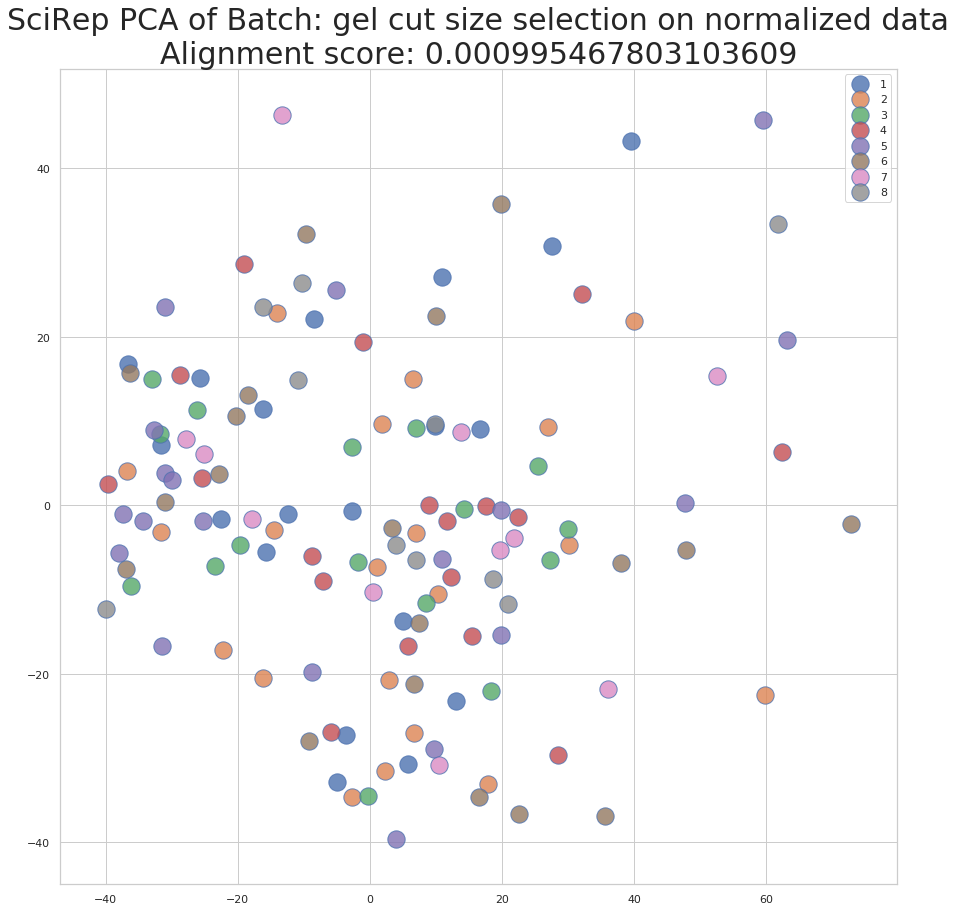

In [145]:
fig, ax = plt.subplots(figsize=(15, 15))
plot_scirep(scirepnormep,ax,'on normalized data',batch_catergory[2])

0
Alignment score: 0.20129694923335895
1
Alignment score: 0.03552209129077473
2
Alignment score: -0.0737959915123057
3
Alignment score: -0.07348444637963315


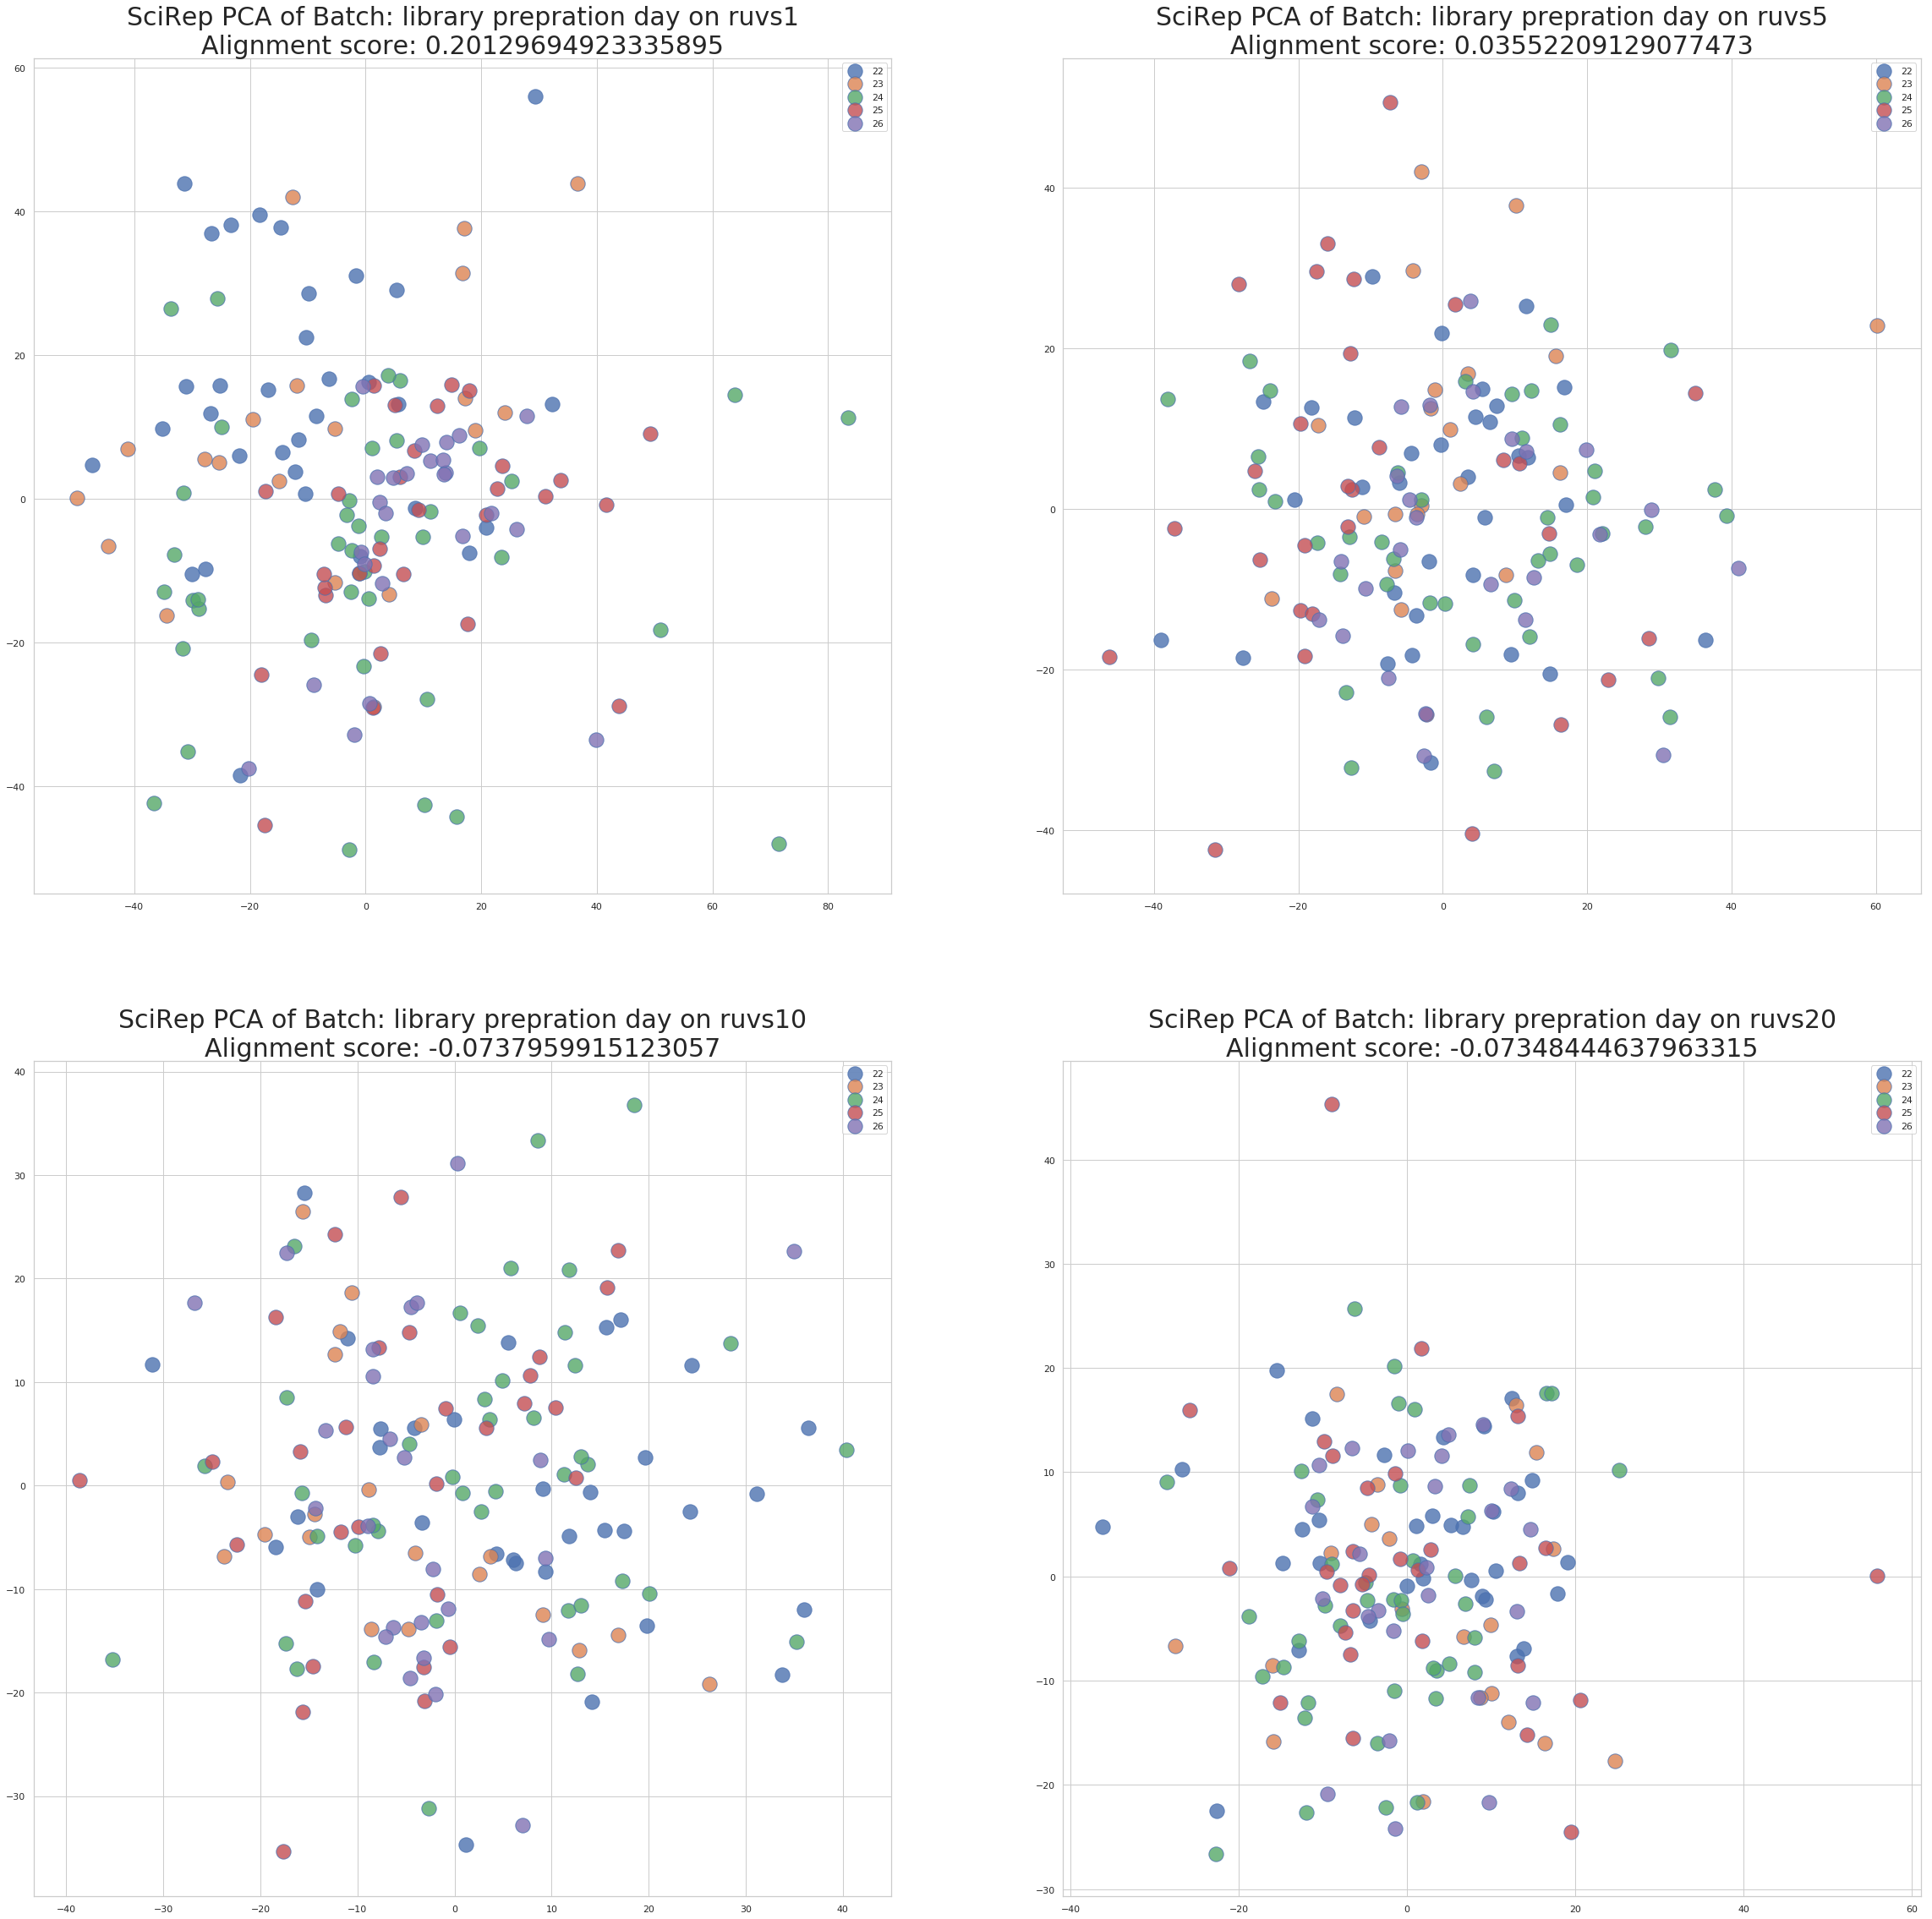

In [146]:
fig, ax = plt.subplots(2,2,figsize=(40, 40))
for i in range(2):
    for j in range(2):
        print (i*2+j)
        plot_scirep(scirepbatch[i*2+j],ax[i,j],'on ruvs'+['1','5','10','20'][i*2+j],batch_catergory[1],True)

0
Alignment score: 0.008717078688651524
1
Alignment score: 0.007194079706334307
2
Alignment score: -0.0031850510261771233
3
Alignment score: -0.0026422949470417847


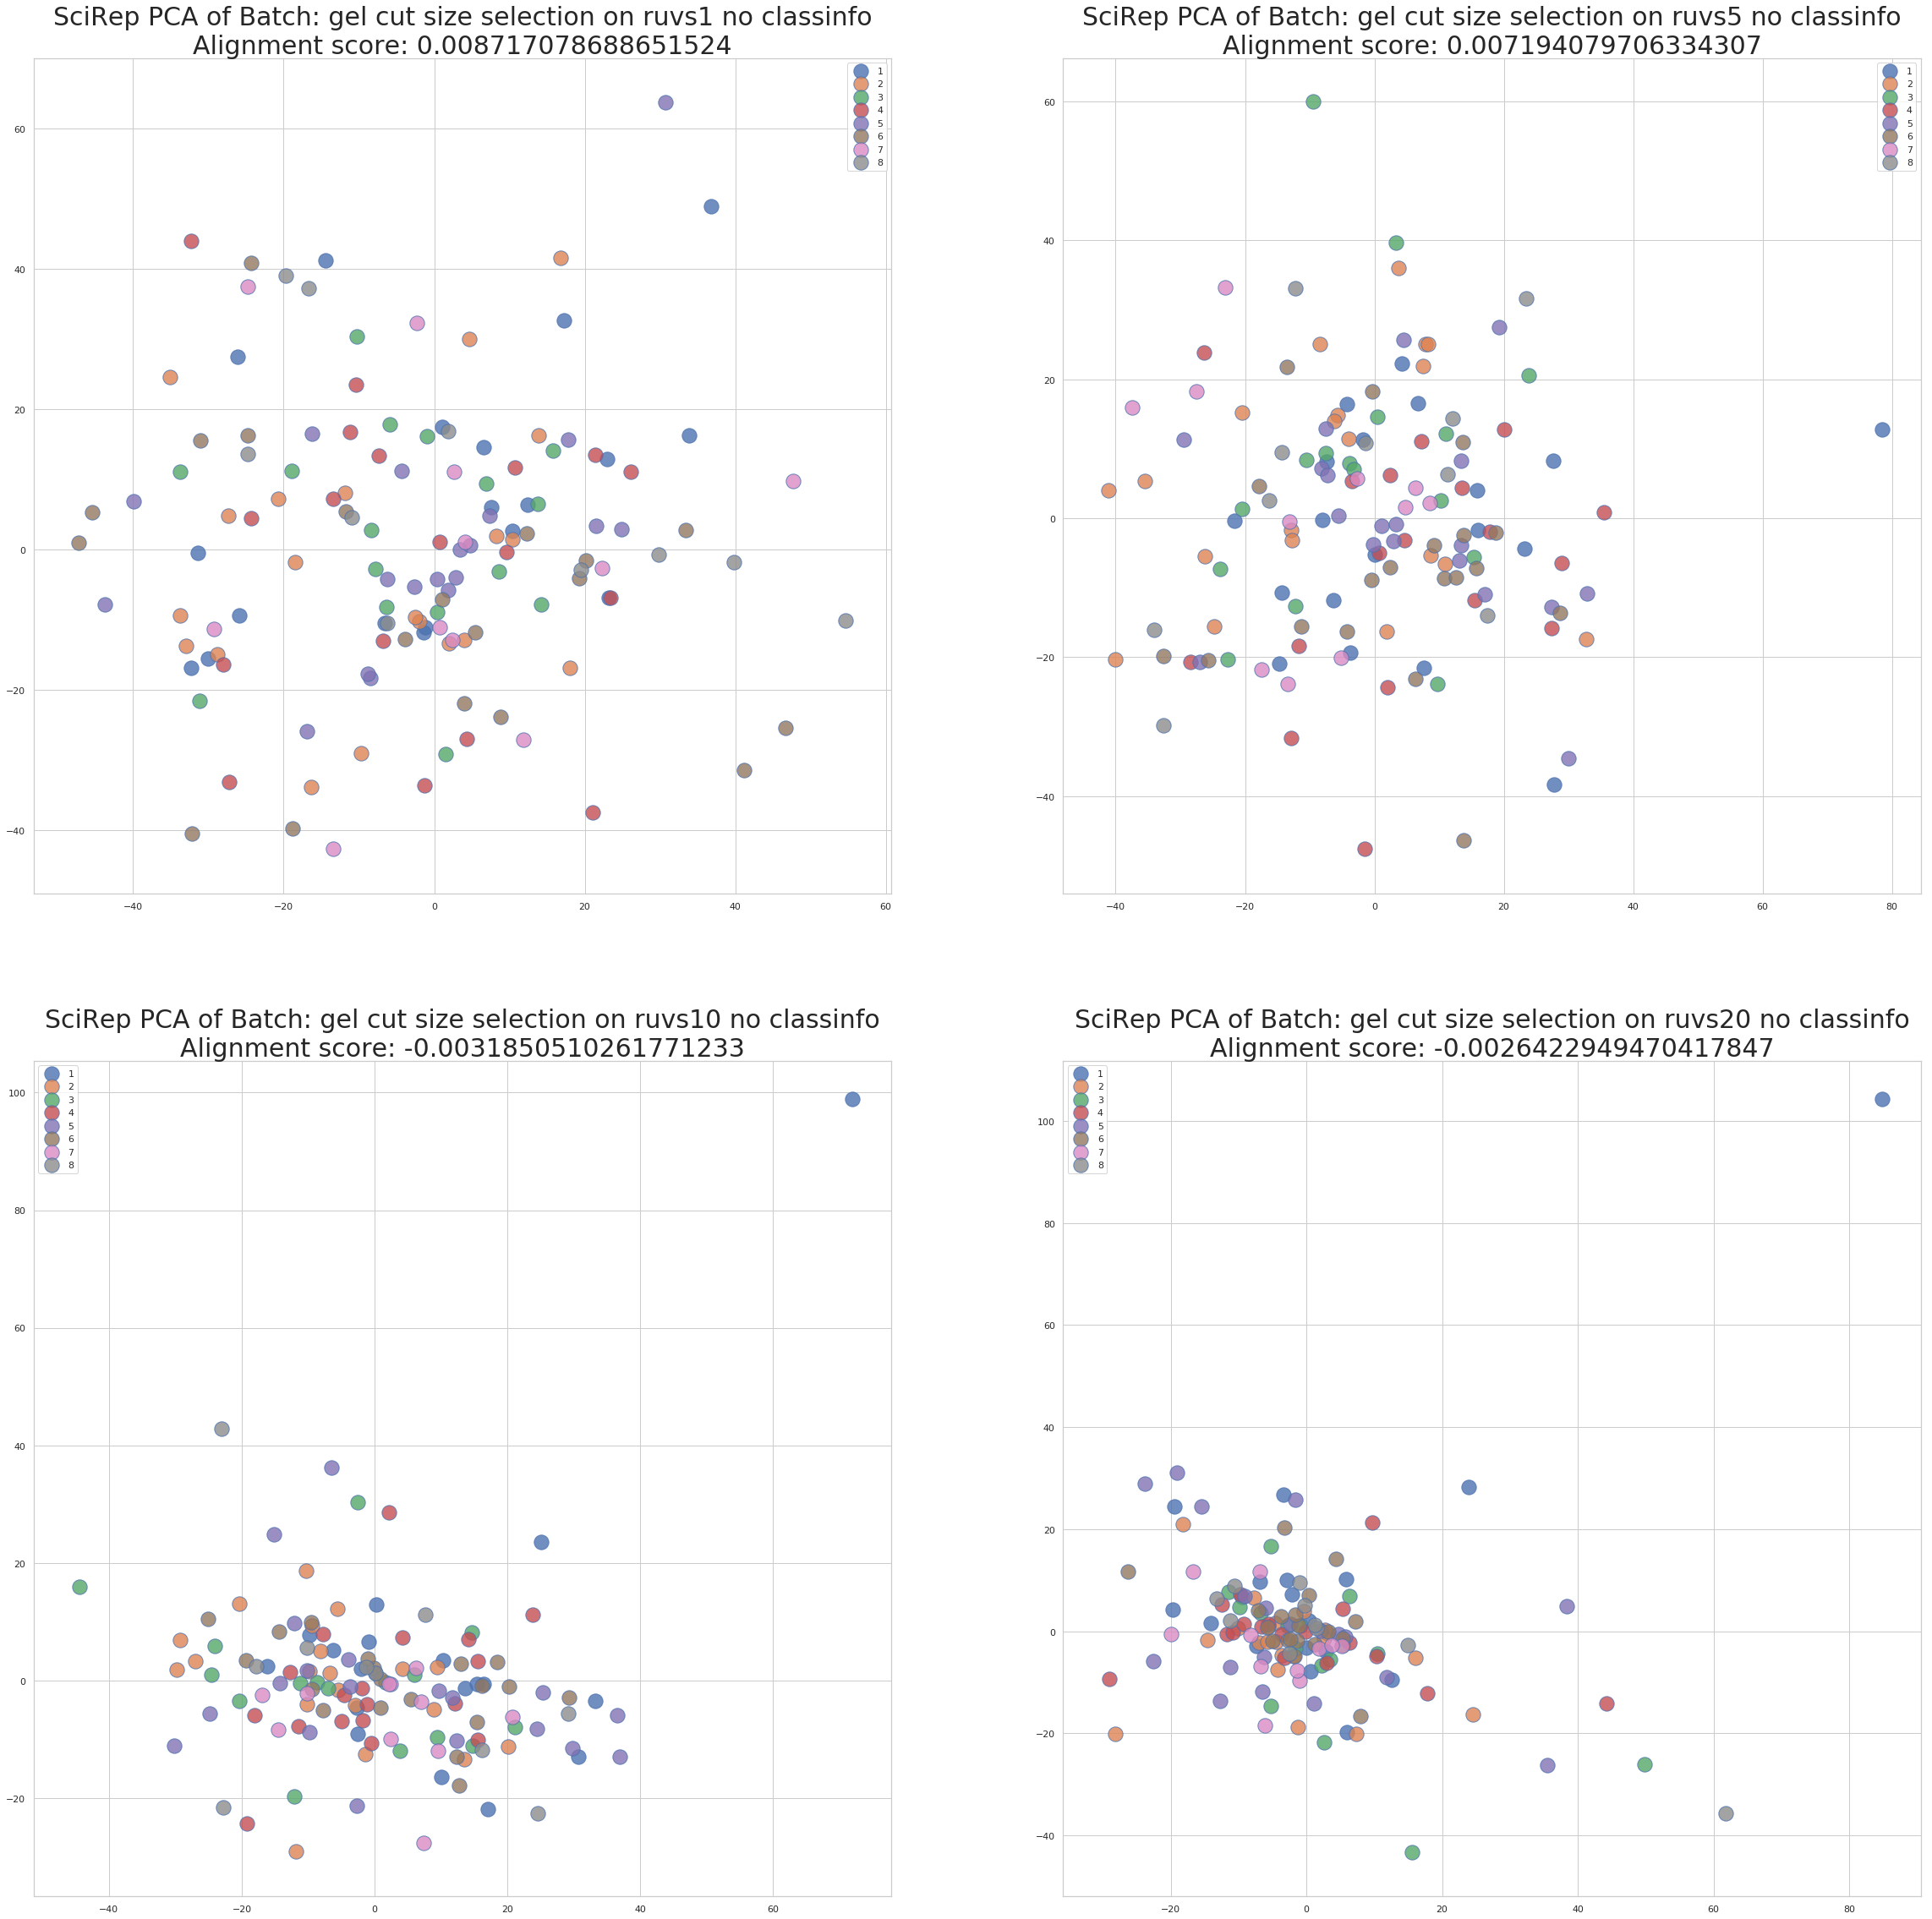

In [141]:
fig, ax = plt.subplots(2,2,figsize=(40, 40))
for i in range(2):
    for j in range(2):
        print (i*2+j)
        plot_scirep(scirepbatch_noinfo[i*2+j],ax[i,j],'on ruvs'+['1','5','10','20'][i*2+j]+' no classinfo',
                    batch_catergory[2],True)

Alignment score: 0.2799670358804041
Alignment score: 0.1615618732086256


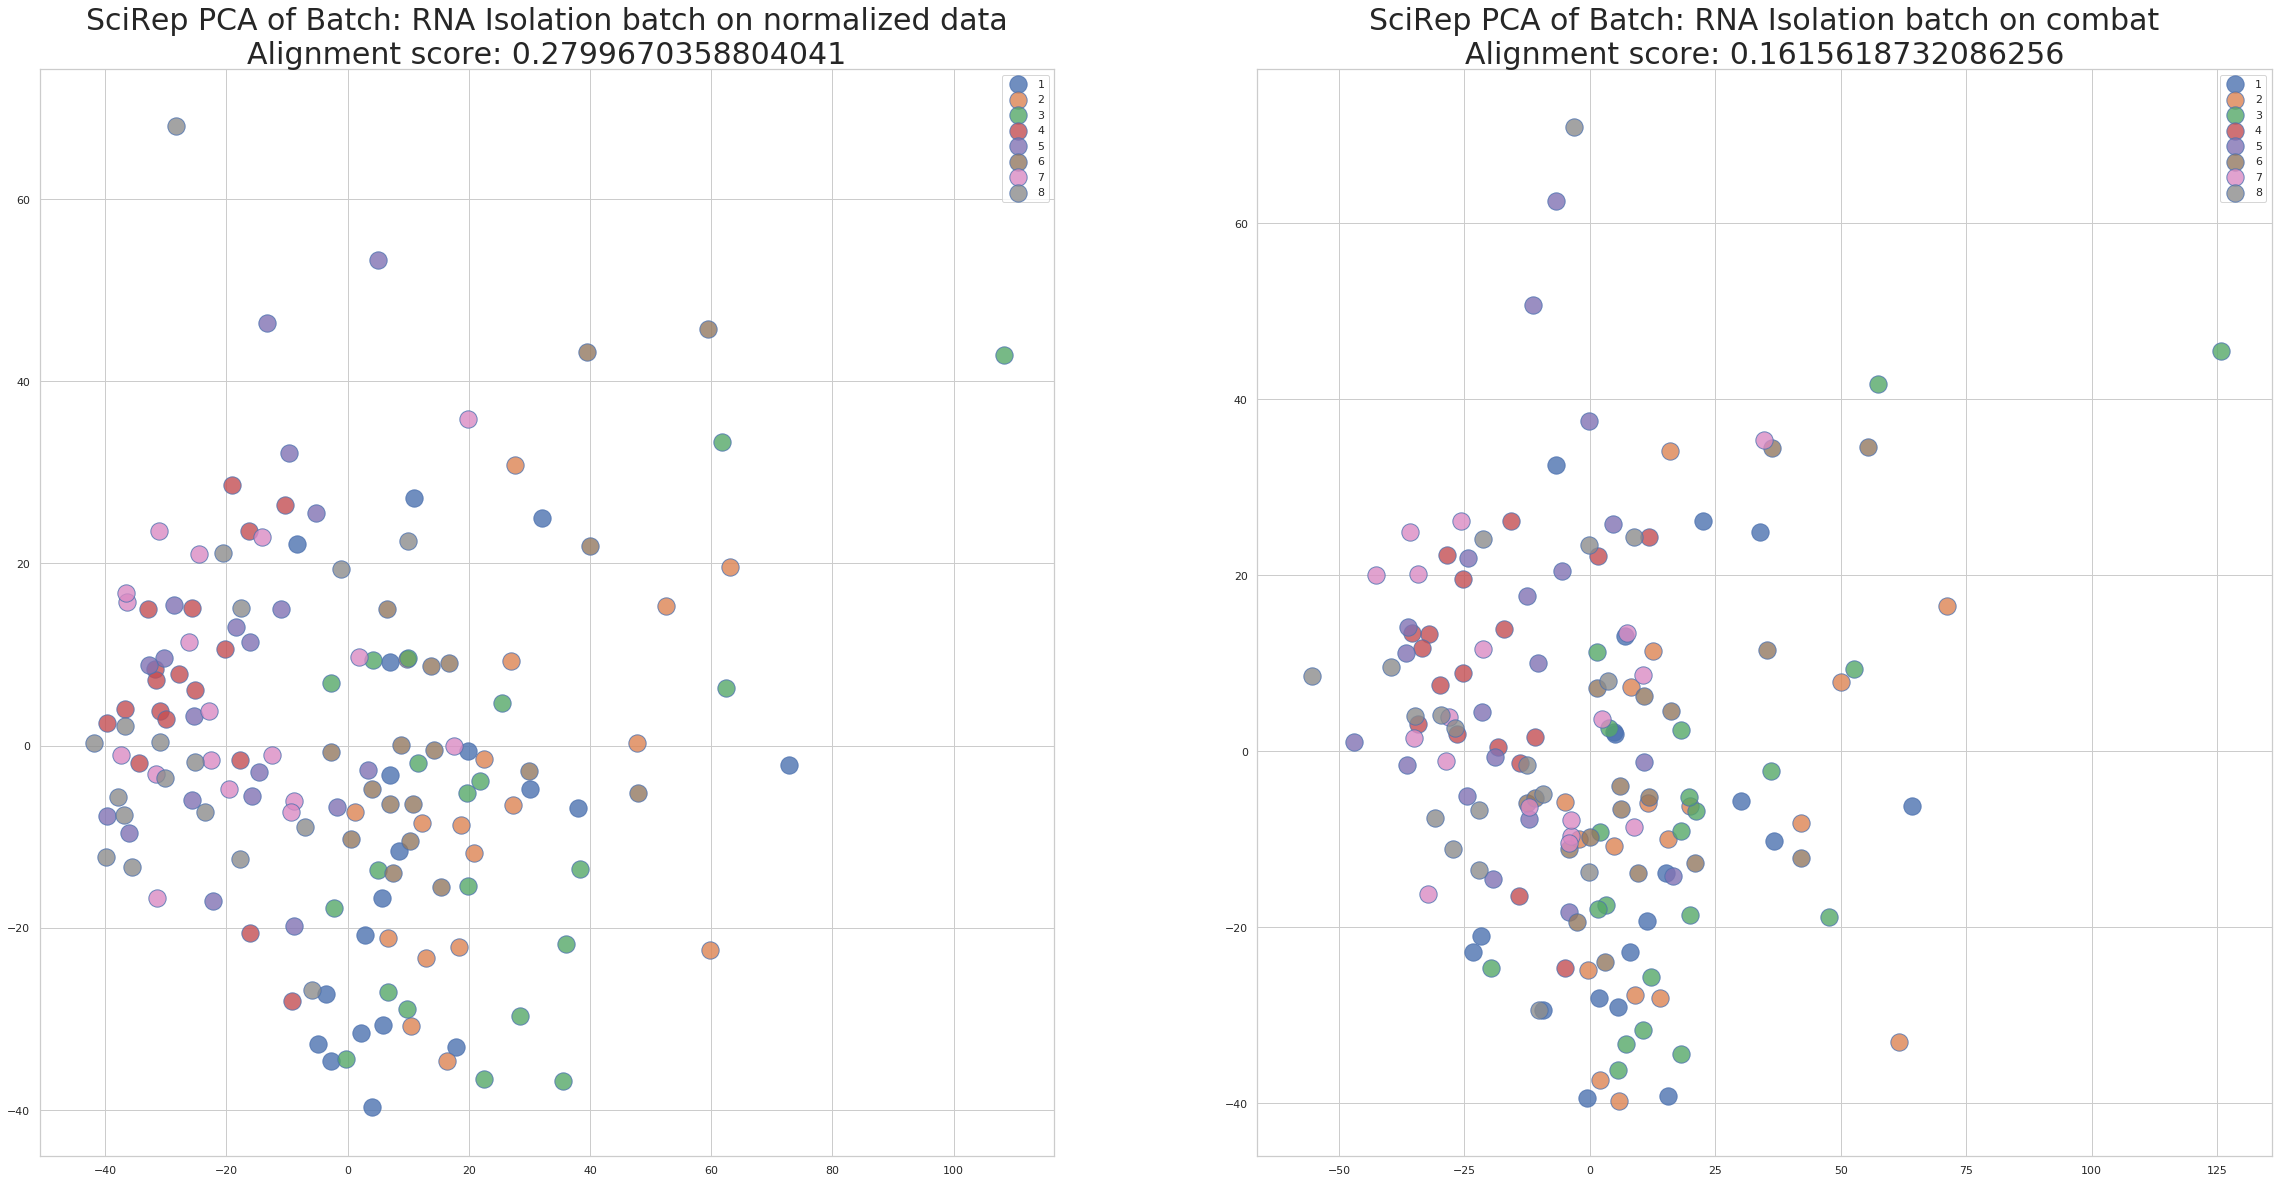

In [149]:
batchcaterind = 0
fig, ax = plt.subplots(1,2,figsize=(40, 20))
plot_scirep(scirepnormep,ax[0],'on normalized data',batch_catergory[batchcaterind ])
plot_scirep(scirepcombat_batch1,ax[1],'on combat',
                    batch_catergory[batchcaterind ],True)

Alignment score: 0.32798798576386223
Alignment score: 0.24202451211595427


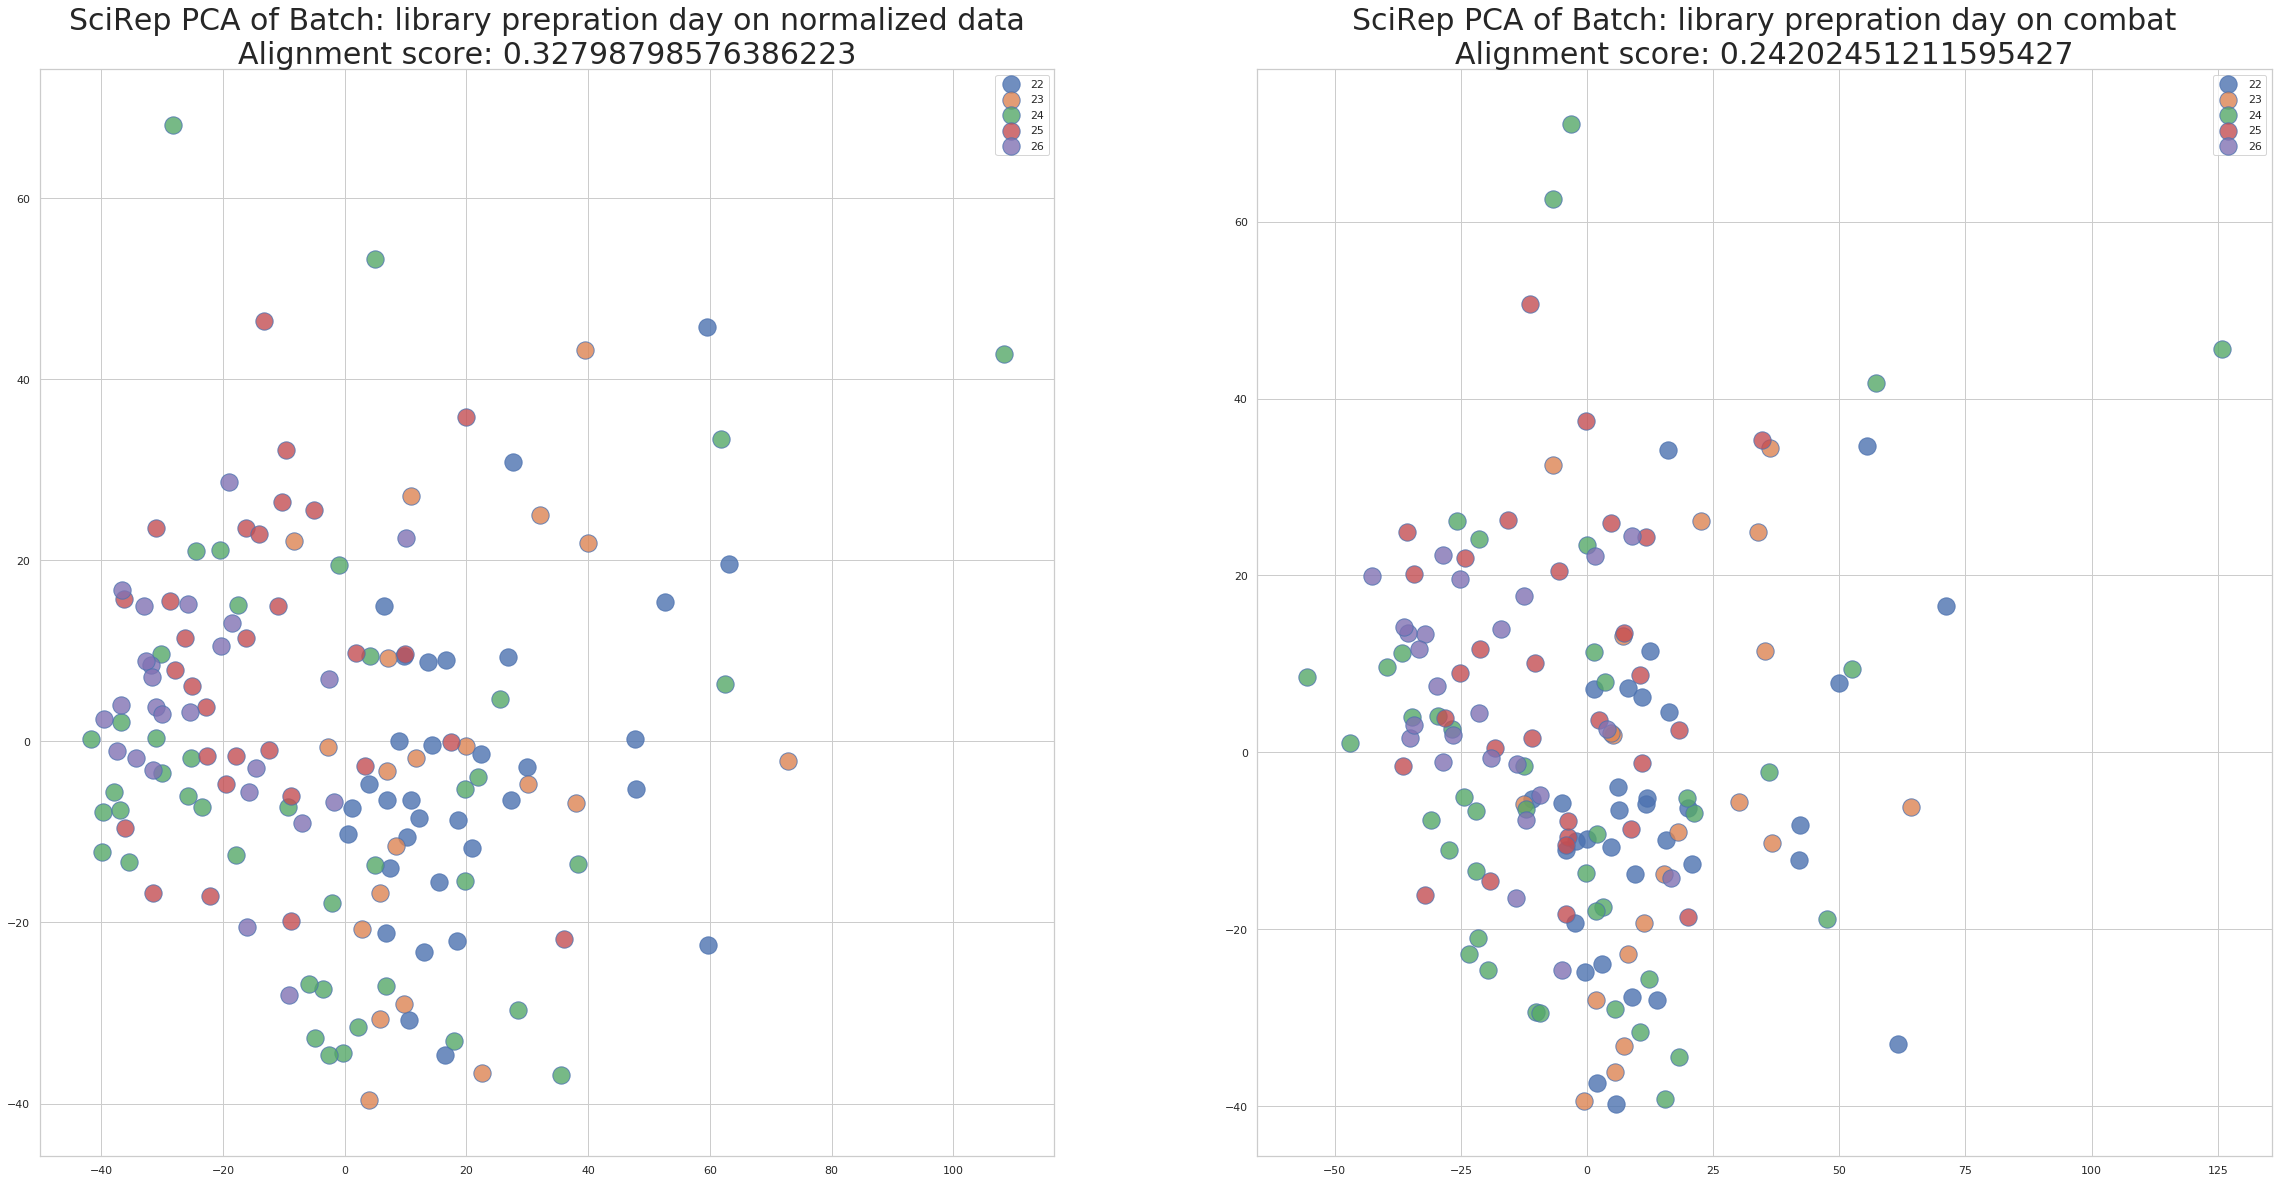

In [150]:
batchcaterind = 1
fig, ax = plt.subplots(1,2,figsize=(40, 20))
plot_scirep(scirepnormep,ax[0],'on normalized data',batch_catergory[batchcaterind ])
plot_scirep(scirepcombat_batch1,ax[1],'on combat',
                    batch_catergory[batchcaterind ],True)

Alignment score: 0.000995467803103609
Alignment score: 0.002887692168235053


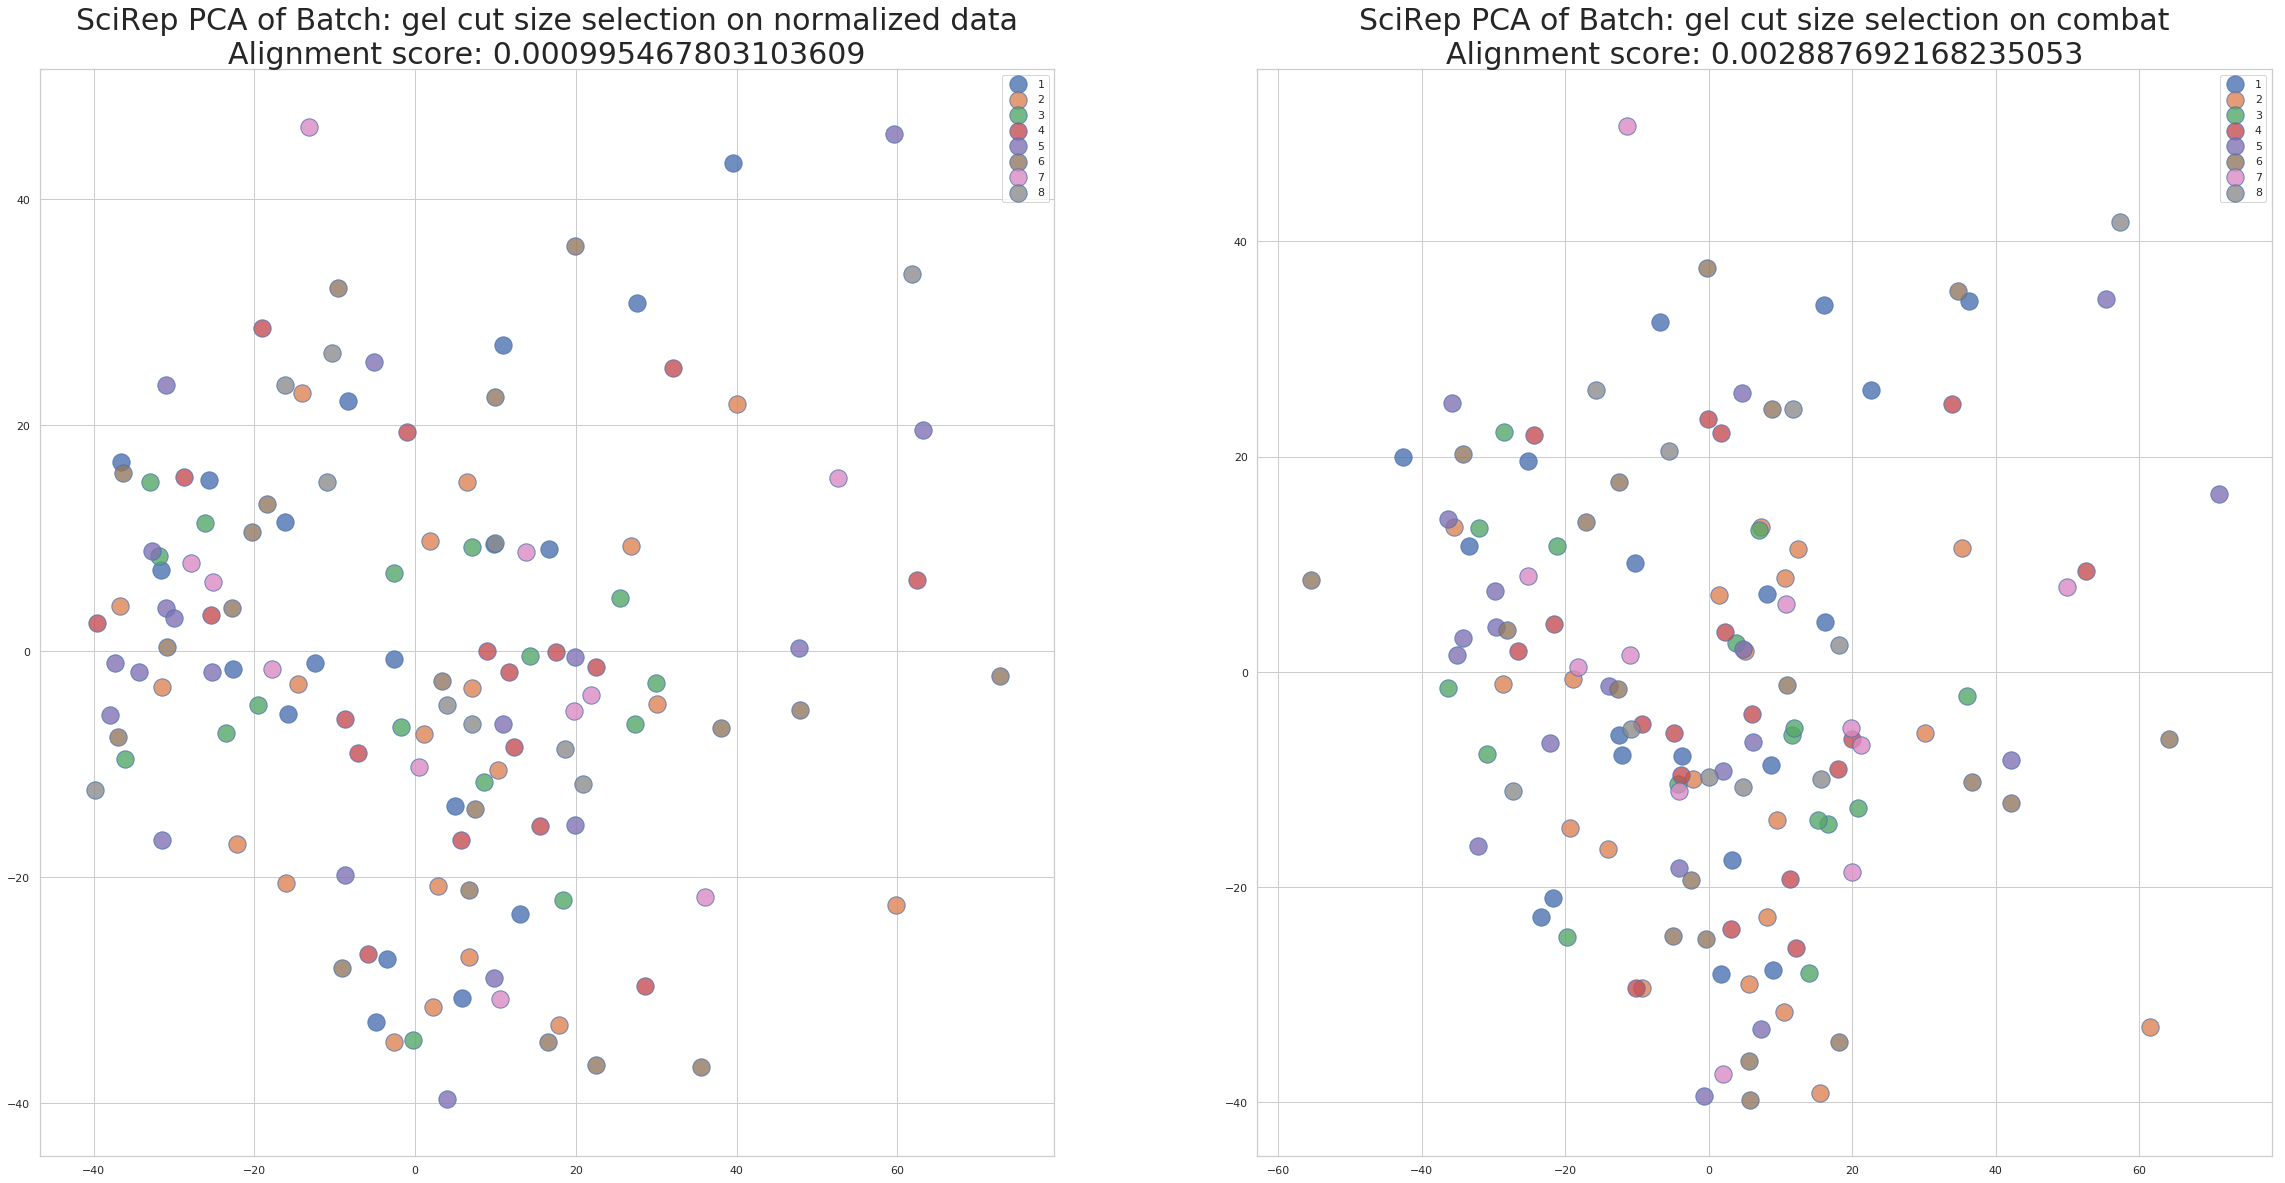

In [151]:
batchcaterind = 2
fig, ax = plt.subplots(1,2,figsize=(40, 20))
plot_scirep(scirepnormep,ax[0],'on normalized data',batch_catergory[batchcaterind ])
plot_scirep(scirepcombat_batch1,ax[1],'on combat',
                    batch_catergory[batchcaterind ],True)

In [152]:
exorbase = pd.read_table('/Share/home/shibinbin/projects/exRNA/output/count_matrix/exoRBase.txt')

In [157]:
exorbase.iloc[:10,:]

,transcript,SRR5712482,SRR5712483,SRR5712484,SRR5712485,SRR5712486,SRR5712487,SRR5712488,SRR5712489,SRR5712490,...,SRR5714912,SRR5714913,SRR5714914,SRR5714915,SRR5714916,SRR5714917,SRR5714918,SRR5714919,SRR5714920,SRR5714921
0,ENST00000473358.1|MIR1302-2HG-202|1544,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ENST00000469289.1|MIR1302-2HG-201|843,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ENST00000417324.1|FAM138A-201|1528,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
3,ENST00000466430.5|AL627309.1-201|31638,4,2,4,0,0,12,5,27,11,...,0,16,18,0,25,2,0,29,13,10
4,ENST00000471248.1|AL627309.1-203|18221,0,0,0,0,0,0,2,2,0,...,0,1,1,0,0,0,0,1,2,6
5,ENST00000610542.1|AL627309.1-205|12999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6,ENST00000493797.1|AL627309.2-201|550,1,0,2,0,0,6,7,13,0,...,0,0,1,8,0,0,0,1,1,14
7,ENST00000484859.1|AL627309.5-201|8234,22,1,2,39,9,95,13,157,5,...,6,12,78,5,59,4,23,8,62,428
8,ENST00000466557.6|AL627309.5-203|27477,1,6,3,0,7,34,25,43,12,...,13,3,0,0,16,0,0,7,33,36
9,ENST00000491962.1|AL627309.5-204|2879,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,20,0,1


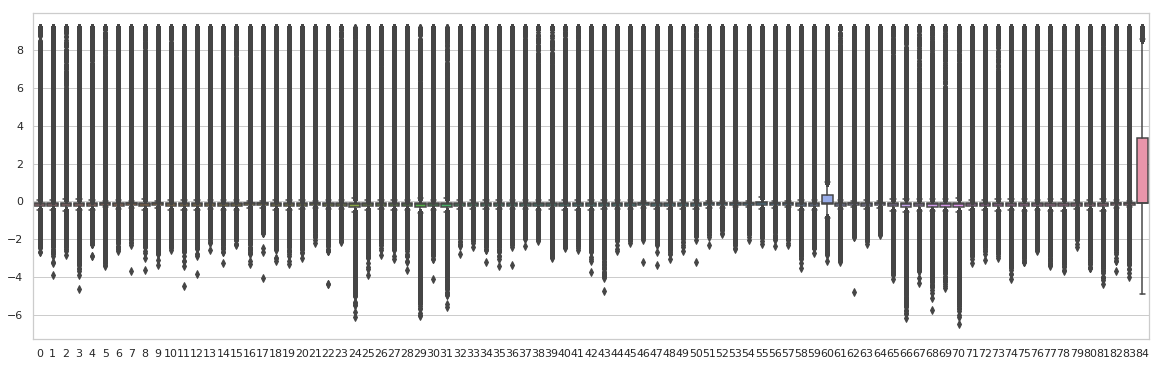

In [171]:
fig,ax=plt.subplots(figsize=(20,6))
sns.boxplot(data=normalizedexo.T)

In [164]:
exorbase.index = exorbase['transcript']
exorbase = exorbase.iloc[:,1:]

In [166]:
cpmexo = exorbase*1e6/exorbase.sum()

In [168]:
X = np.log2(cpmexo + 1).T

normalizedexo =  StandardScaler().fit_transform(X)

In [170]:
normalizedexo.shape

(85, 111131)

In [172]:
lyscirep = pd.read_table('/Share/home/younglee/projects/exRNA/GSE71008/GSE71008_Data_matrix.txt')

In [175]:
np.array(lyscirep.columns)[1:]

array(['1S1', '1S2', '1S3', '2S1', '2S2', '2S3', '3S1', '3S2', '3S3',
       '4S1', '4S2', '4S3', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
       'N1', 'N2', 'N3', 'N4', 'N5', 'N6', '1S4', '1S5', '2S4', '2S5',
       '2S6', '3S4', '3S5', '3S6', '4S4', 'N7', 'N8', 'N9', 'N10', 'N11',
       'N12', '1S9', '2S7', '2S8', '2S9', '3S7', '3S8', '4S8', '4S9',
       'PC13', 'PC14', 'PC15', 'PC16', 'N13', 'N14', 'N15', 'N16', 'N17',
       'N18', 'N22', 'N23', 'N24', '1S6', '4S5', '4S6', 'PC7', 'PC8',
       'PC9', 'PC10', '1S7', '1S8', '3S9', '4S7', 'PC17', 'N49', '1S10',
       '1S11', '1S25', '2S10', '2S25', '2S11', '2S12', '3S10', '3S11',
       '3S12', '4S10', '4S11', '4S12', 'PC18', 'PC19', 'PC20', 'N19',
       'N50', '3S18', '3S25', '4S16', '4S25', 'PC11', 'PC12', '1S20',
       '4S19', '1S22', '1S24', '2S22', '2S23', '2S24', '3S22', '3S23',
       '3S24', '4S22', '4S23', '4S24', 'PC36', 'N43', 'N45', 'N46', 'N47',
       'N48', 'TB#549', 'TB#650', 'TB#670', 'TB#535', 'TB#01.1', 'S021'

In [179]:
np.array(pd.read_excel('data/192_sample_batch.xlsx',sep=',')['sampleID'])

array(['1S1', '1S2', '1S3', '2S1', '2S2', '2S3', '3S1', '3S2', '3S3',
       '4S1', '4S2', '4S3', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
       'N1', 'N2', 'N3', 'N4', 'N5', 'N6', '1S4', '1S5', '2S4', '2S5',
       '2S6', '3S4', '3S5', '3S6', '4S4', 'N7', 'N8', 'N9', 'N10', 'N11',
       'N12', '1S9', '2S7', '2S8', '2S9', '3S7', '3S8', '4S8', '4S9',
       'PC13', 'PC14', 'PC15', 'PC16', 'N13', 'N14', 'N15', 'N16', 'N17',
       'N18', 'N22', 'N23', 'N24', '1S6', '4S5', '4S6', 'PC7', 'PC8',
       'PC9', 'PC10', '1S7', '1S8', '3S9', '4S7', 'PC17', 'N49', '1S10',
       '1S11', '1S25', '2S10', '2S25', '2S11', '2S12', '3S10', '3S11',
       '3S12', '4S10', '4S11', '4S12', 'PC18', 'PC19', 'PC20', 'N19',
       'N50', '3S18', '3S25', '4S16', '4S25', 'PC11', 'PC12', '1S20',
       '4S19', '1S22', '1S24', '2S22', '2S23', '2S24', '3S22', '3S23',
       '3S24', '4S22', '4S23', '4S24', 'PC36', 'N43', 'N45', 'N46', 'N47',
       'N48', 'TB#549_Pan01', 'TB#650_Pan02', 'TB#670_Pan03',
       'T

In [181]:
np.array(scirepnormbatch1.columns)

array(['Sample_1S3', 'Sample_1S6', 'Sample_1S9', 'Sample_1S12',
       'Sample_1S15', 'Sample_1S18', 'Sample_1S21', 'Sample_1S24',
       'Sample_4S2', 'Sample_4S5', 'Sample_4S8', 'Sample_4S11',
       'Sample_4S14', 'Sample_4S17', 'Sample_4S20', 'Sample_4S23',
       'Sample_2S1', 'Sample_2S4', 'Sample_2S7', 'Sample_2S10',
       'Sample_2S13', 'Sample_2S16', 'Sample_2S19', 'Sample_2S22',
       'Sample_4S3', 'Sample_4S6', 'Sample_4S9', 'Sample_4S12',
       'Sample_4S15', 'Sample_4S18', 'Sample_4S21', 'Sample_4S24',
       'Sample_2S2', 'Sample_2S5', 'Sample_2S8', 'Sample_2S11',
       'Sample_2S14', 'Sample_2S17', 'Sample_2S20', 'Sample_2S23',
       'Sample_2S3', 'Sample_2S6', 'Sample_2S9', 'Sample_2S12',
       'Sample_2S15', 'Sample_2S18', 'Sample_2S21', 'Sample_2S24',
       'Sample_3S1', 'Sample_3S4', 'Sample_3S7', 'Sample_3S10',
       'Sample_3S13', 'Sample_3S16', 'Sample_3S19', 'Sample_3S22',
       'Sample_2S25', 'Sample_3S2', 'Sample_3S5', 'Sample_3S8',
       'Sample_3S11

In [182]:
pd.read_excel('data/192_sample_batch.xlsx',sep=',')

,sampleID,RNA Isolation batch,library prepration day,gel cut size selection
0,1S1,2,22,7
1,1S2,2,22,8
2,1S3,2,22,1
3,2S1,2,22,2
4,2S2,2,22,3
5,2S3,2,22,4
6,3S1,2,22,5
7,3S2,2,22,6
8,3S3,2,22,7
9,4S1,2,22,8
